In [1]:
import pandas as pd
df = pd.read_csv('C:/datasets/data_job.csv')
df


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020,Machine Learning Engineer (Remote),NaN,NaN,179769,179111,UK,NaN,CT,In-person,IN,NaN
4996,2021,Machine Learning Engineer (Remote),NaN,NaN,184642,196373,CN,NaN,FL,Remote,UK,NaN
4997,2022,Machine Learning Engineer,Analysis,GBP,135319,51366,UK,EN,FL,Hybrid,JP,M
4998,2021,Statistician,Data Science,EUR,58037,181817,US,MI,PT,Remote,DE,S


In [2]:
df.duplicated().any()

False

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [4]:
cat_col=[col for col in df.columns if df[col].dtype=='object']
print('Categorical Columns:',cat_col)

num_col=[col for col in df.columns if df[col].dtype != 'object']
print('Numerical Columns:',num_col)

Categorical Columns: ['job_title', 'job_category', 'salary_currency', 'employee_residence', 'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']
Numerical Columns: ['work_year', 'salary', 'salary_in_usd']


In [5]:
df.isnull().sum()

work_year               0
job_title               0
job_category          500
salary_currency       500
salary                  0
salary_in_usd           0
employee_residence      0
experience_level      500
employment_type         0
work_setting            0
company_location        0
company_size          500
dtype: int64

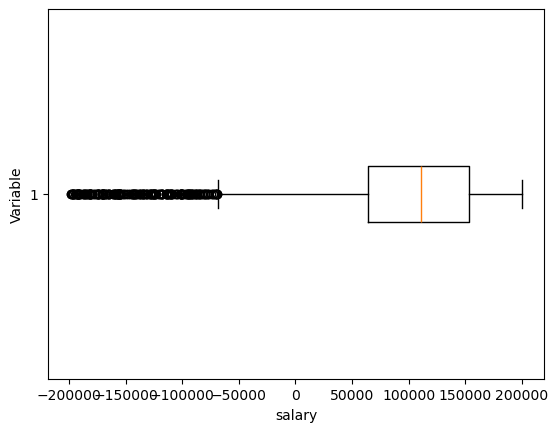

In [6]:
import matplotlib.pyplot as plt

plt.boxplot(df['salary'], vert=False)
plt.ylabel('Variable')
plt.xlabel('salary')
plt.show()

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:/datasets/data_job.csv')

df['salary'].fillna(df['salary'].median(), inplace=True)
df['salary_in_usd'].fillna(df['salary_in_usd'].median(), inplace=True)
df['job_category'].fillna(df['job_category'].mode()[0], inplace=True)
df['salary_currency'].fillna(df['salary_currency'].mode()[0], inplace=True)
df['experience_level'].fillna(df['experience_level'].mode()[0], inplace=True)
df['company_size'].fillna(df['company_size'].mode()[0], inplace=True)

import pandas as pd
import numpy as np

columns = ['salary','salary_in_usd']

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df
    
for col in columns:
    df = handle_outliers(df, col)

df

C:\Users\Shreyash.Damle\AppData\Local\Temp\ipykernel_11008\2421855891.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary'].fillna(df['salary'].median(), inplace=True)
C:\Users\Shreyash.Damle\AppData\Local\Temp\ipykernel_11008\2421855891.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597.0,136086.0,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630.0,67982.0,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280.0,153309.0,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130.0,135242.0,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312.0,35156.0,UK,MI,FT,In-person,UK,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020,Machine Learning Engineer (Remote),Data Science,EUR,179769.0,179111.0,UK,SE,CT,In-person,IN,S
4996,2021,Machine Learning Engineer (Remote),Data Science,EUR,184642.0,196373.0,CN,SE,FL,Remote,UK,S
4997,2022,Machine Learning Engineer,Analysis,GBP,135319.0,51366.0,UK,EN,FL,Hybrid,JP,M
4998,2021,Statistician,Data Science,EUR,58037.0,181817.0,US,MI,PT,Remote,DE,S


In [8]:
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

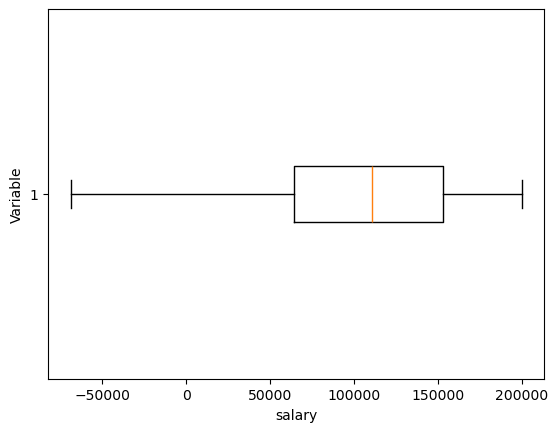

In [9]:
import matplotlib.pyplot as plt

plt.boxplot(df['salary'], vert=False)
plt.ylabel('Variable')
plt.xlabel('salary')
plt.show()

               work_year    salary  salary_in_usd
work_year       1.000000  0.021190      -0.015542
salary          0.021190  1.000000       0.010565
salary_in_usd  -0.015542  0.010565       1.000000


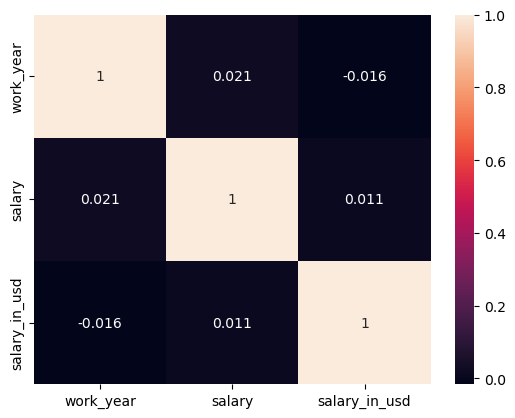

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


corr_mat = df.corr(numeric_only = True)

print(corr_mat)

sns.heatmap(corr_mat,  annot=True)
plt.show()



In [10]:
import pandas as pd
import numpy as np
df=pd.read_csv('C:\datasets\data_job.csv') 

df_encoded = pd.get_dummies(df,drop_first=True)
corr_mat = df_encoded.corr()
print(corr_mat)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Shreyash.Damle\AppData\Local\Temp\ipykernel_11008\3302427151.py:3: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv('C:\datasets\data_job.csv')


                                                work_year    salary  \
work_year                                        1.000000  0.027264   
salary                                           0.027264  1.000000   
salary_in_usd                                   -0.015542  0.010767   
job_title_Data Analyst  (Remote)                -0.027496 -0.006596   
job_title_Data Analyst  in office                0.030936  0.005600   
job_title_Data Engineer                          0.014479 -0.002278   
job_title_Data Engineer  (Remote)                0.000818  0.006534   
job_title_Data Engineer  in office              -0.005924  0.011872   
job_title_Data Scientist                        -0.002678 -0.015820   
job_title_Data Scientist  (Remote)              -0.012963  0.027520   
job_title_Data Scientist  in office              0.001628 -0.013169   
job_title_Machine Learning Engineer             -0.006009 -0.034054   
job_title_Machine Learning Engineer  (Remote)    0.002553  0.004768   
job_ti

In [7]:
!pip install pandas scikit-learn tensorflow

In [13]:
import pandas as pd
import numpy as np

x = df.drop(columns = ['salary_in_usd','salary','salary_currency'])
y = df['salary_in_usd']

cat_cols = x.select_dtypes(include = ['object']).columns.tolist()
numeric_cols =  x.select_dtypes(include = ['int64','float64']).columns.tolist()

from sklearn.preprocessing import LabelEncoder, StandardScaler
label_en = {}
for col in cat_cols:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
    label_en[col] = le

scale = StandardScaler()
x[numeric_cols] = scale.fit_transform(x[numeric_cols])

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation ='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation = 'relu'),
    Dense(1)
])

custom_optimizer = Adam(learning_rate = 1.0)
model.compile(optimizer = custom_optimizer, loss ='mean_squared_error', metrics=['mae'])

fcb = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2,verbose=1)
test_loss, test_mae = model.evaluate(x_test, y_test)
print("Test MAE:" ,test_mae)
    



Epoch 1/100


C:\Users\Shreyash.Damle\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5939585024.0000 - mae: 62455.5195 - val_loss: 3328883968.0000 - val_mae: 48855.6758
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3022583808.0000 - mae: 45917.2500 - val_loss: 4355371008.0000 - val_mae: 53935.1094
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3408923904.0000 - mae: 48504.0469 - val_loss: 2630106624.0000 - val_mae: 44379.1445
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2579284736.0000 - mae: 43313.6328 - val_loss: 2591159040.0000 - val_mae: 44296.4258
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2543251456.0000 - mae: 43026.2578 - val_loss: 2572213504.0000 - val_mae: 44087.1055
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2551931904.0000 - mae: 43573.7461 - val_loss: 2516484096.0000 - val_mae: 43849.1406
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2501210112.0000 - mae: 43053.1406 - val_loss: 3052665600.0000 - val_mae: 46424.3633
Epoch 8/100